In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ########### PARA QUE FUNCIONE ES NECESARIO POSEER COPIA DE LA CARPETA C16-103-t-data-bi CON SU CONTENIDO EN EL DRIVE DEL USUARIO DE ESTE COLLAB #######
df = pd.read_parquet('/content/drive/MyDrive/C16-103-t-data-bi/DATASCIENCE- DETECCION DE FRAUDES/CSV - PROCESADO/Fraude_procesado.parquet')

In [ ]:
df.head()

,step,type,amount,nameOrig,nameDest,isFraud,oldbalanceDest,oldbalanceOrg
0,1,TRANSFER,181.00,C1305486145,C553264065,1,0.0,181.0
1,1,CASH_OUT,181.00,C840083671,C38997010,1,21182.0,181.0
2,1,CASH_OUT,229133.94,C905080434,C476402209,0,5083.0,15325.0
3,1,TRANSFER,215310.30,C1670993182,C1100439041,0,22425.0,705.0
4,1,TRANSFER,311685.89,C1984094095,C932583850,0,6267.0,10835.0


#### Convertimos datos categóricos a númericos


In [ ]:
df_type_encod = pd.get_dummies(df, columns=['type'])

In [ ]:
df_type_encod.head()

,step,amount,nameOrig,nameDest,isFraud,oldbalanceDest,oldbalanceOrg,type_CASH_OUT,type_TRANSFER
0,1,181.00,C1305486145,C553264065,1,0.0,181.0,0,1
1,1,181.00,C840083671,C38997010,1,21182.0,181.0,1,0
2,1,229133.94,C905080434,C476402209,0,5083.0,15325.0,1,0
3,1,215310.30,C1670993182,C1100439041,0,22425.0,705.0,0,1
4,1,311685.89,C1984094095,C932583850,0,6267.0,10835.0,0,1


Observemos el rango del monto

In [ ]:
df_type_encod.amount.describe()

count    2.767966e+06
mean     3.004257e+05
std      6.062929e+05
min      0.000000e+00
25%      8.290016e+04
50%      1.710923e+05
75%      3.062524e+05
max      1.000000e+07
Name: amount, dtype: float64

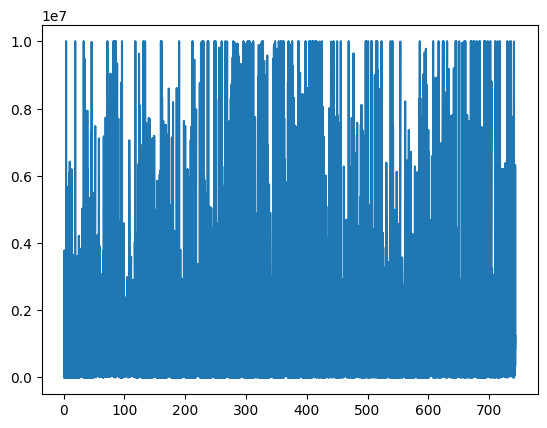

In [ ]:
plt.plot(df_type_encod.step, df_type_encod.amount)

Se trata de valores muy grandes, conviene estandarizar esos valores para que a la hora de aplicar modelos de predicción los cálculos no resulten en valores astronómicos que sobrepasen la capacidad del computador y produzcan resultados erróneos.

Posponemos esta transformación hasta la etapa de modelado de datos en caso de que el investigador desee un rango de montos diferente a la hora de estandarizar.

Guardamos las transformaciones en formato parquet

In [ ]:
ruta_archivo = '/content/drive/MyDrive/C16-103-t-data-bi/DATASCIENCE- DETECCION DE FRAUDES/TRANSFORMACIONES/data_transfo.parquet'
df_type_encod.to_parquet(ruta_archivo, index=False)